# Statistiques Descriptives finales, sur la base finale sur la base `database_sieges.csv`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
database = pd.read_csv("database_sieges.csv",low_memory=False,decimal=',')

In [3]:
database.tail(5)

Unnamed: 0        Date       Faisceau               Pays  \
2078041     2078041  2016-12-30  International            ALGERIE   
2078042     2078042  2016-12-31        Dom Tom  FRANCE GUADELOUPE   
2078043     2078043  2016-12-30       National             FRANCE   
2078044     2078044  2016-12-31  International              MAROC   
2078045     2078045  2016-12-30       National             FRANCE   

                            Ville Terrain Terminal Aerog  \
2078041        Annaba Les Salines    ORLY     ORYS  ORYS   
2078042  Pointe à Pitre Le Raizet    ORLY     ORYW  ORYO   
2078043                  Biarritz    ORLY     ORYW  ORYO   
2078044                Rabat Sale    ORLY     ORYS  ORYS   
2078045          Toulouse Blagnac    ORLY     ORYW  ORYO   

                            Aerop Code Aerop  ...   ArrDep   NumVol TypAv MVT  \
2078041        Annaba Les Salines       DABB  ...   Départ  DAH1115   73H   1   
2078042  Pointe à Pitre Le Raizet       TFFR  ...   Départ   AFR792   77W   1   
2078043                  Biarritz       LFBZ  ...  Arrivée  AFR7487   319   1   
2078044                Rabat Sale       GMME  ...   Départ   RAM783   73H   1   
2078045          Toulouse Blagnac       LFBO  ...  Arrivée  AFR6131   321   1   

         PAX  Date Equiv  MVT_FQM PAX_FQM Coeff_Rempl_FQM  \
2078041  113  2011-12-30      1.0  102.06            0.63   
2078042  389  2015-12-31      1.0   283.2             0.6   
2078043  145  2015-01-02      1.0   142.4             0.8   
2078044  101  2011-12-31      1.0   100.1            0.55   
2078045   75  2015-01-02      1.0   142.4             0.8   

        Sièges Corrections_ICI  
2078041      188.5634623992838  
2078042                  472.0  
2078043     139.56106690100734  
2078044      188.5634623992838  
2078045     203.63568281938325  

[5 rows x 22 columns]

In [3]:
database = database.astype({'Sièges Corrections_ICI': 'float64','PAX_FQM': 'float64','Coeff_Rempl_FQM': 'float64'})
database['Coeff_Rempl'] = database['PAX']/database['Sièges Corrections_ICI']
database = database.astype({'Date': 'datetime64[ns]'})
database['Week'] = database["Date"].dt.strftime('%Y%W')

In [4]:
faisceaux = ["National","Schengen","Dom Tom","Autre UE","International"]

database_depart = database[database['ArrDep'].isin(['Départ'])]

database_depart_tronque = database_depart[database_depart['Date']>np.datetime64('2014-12-31')]

database_depart_tronque2 = database_depart[database_depart['Date']>np.datetime64('2016-10-02')]
database_depart_tronque2 = database_depart_tronque2[database_depart_tronque2['Date']<np.datetime64('2016-11-21')]

## Représentations du nombre de passagers

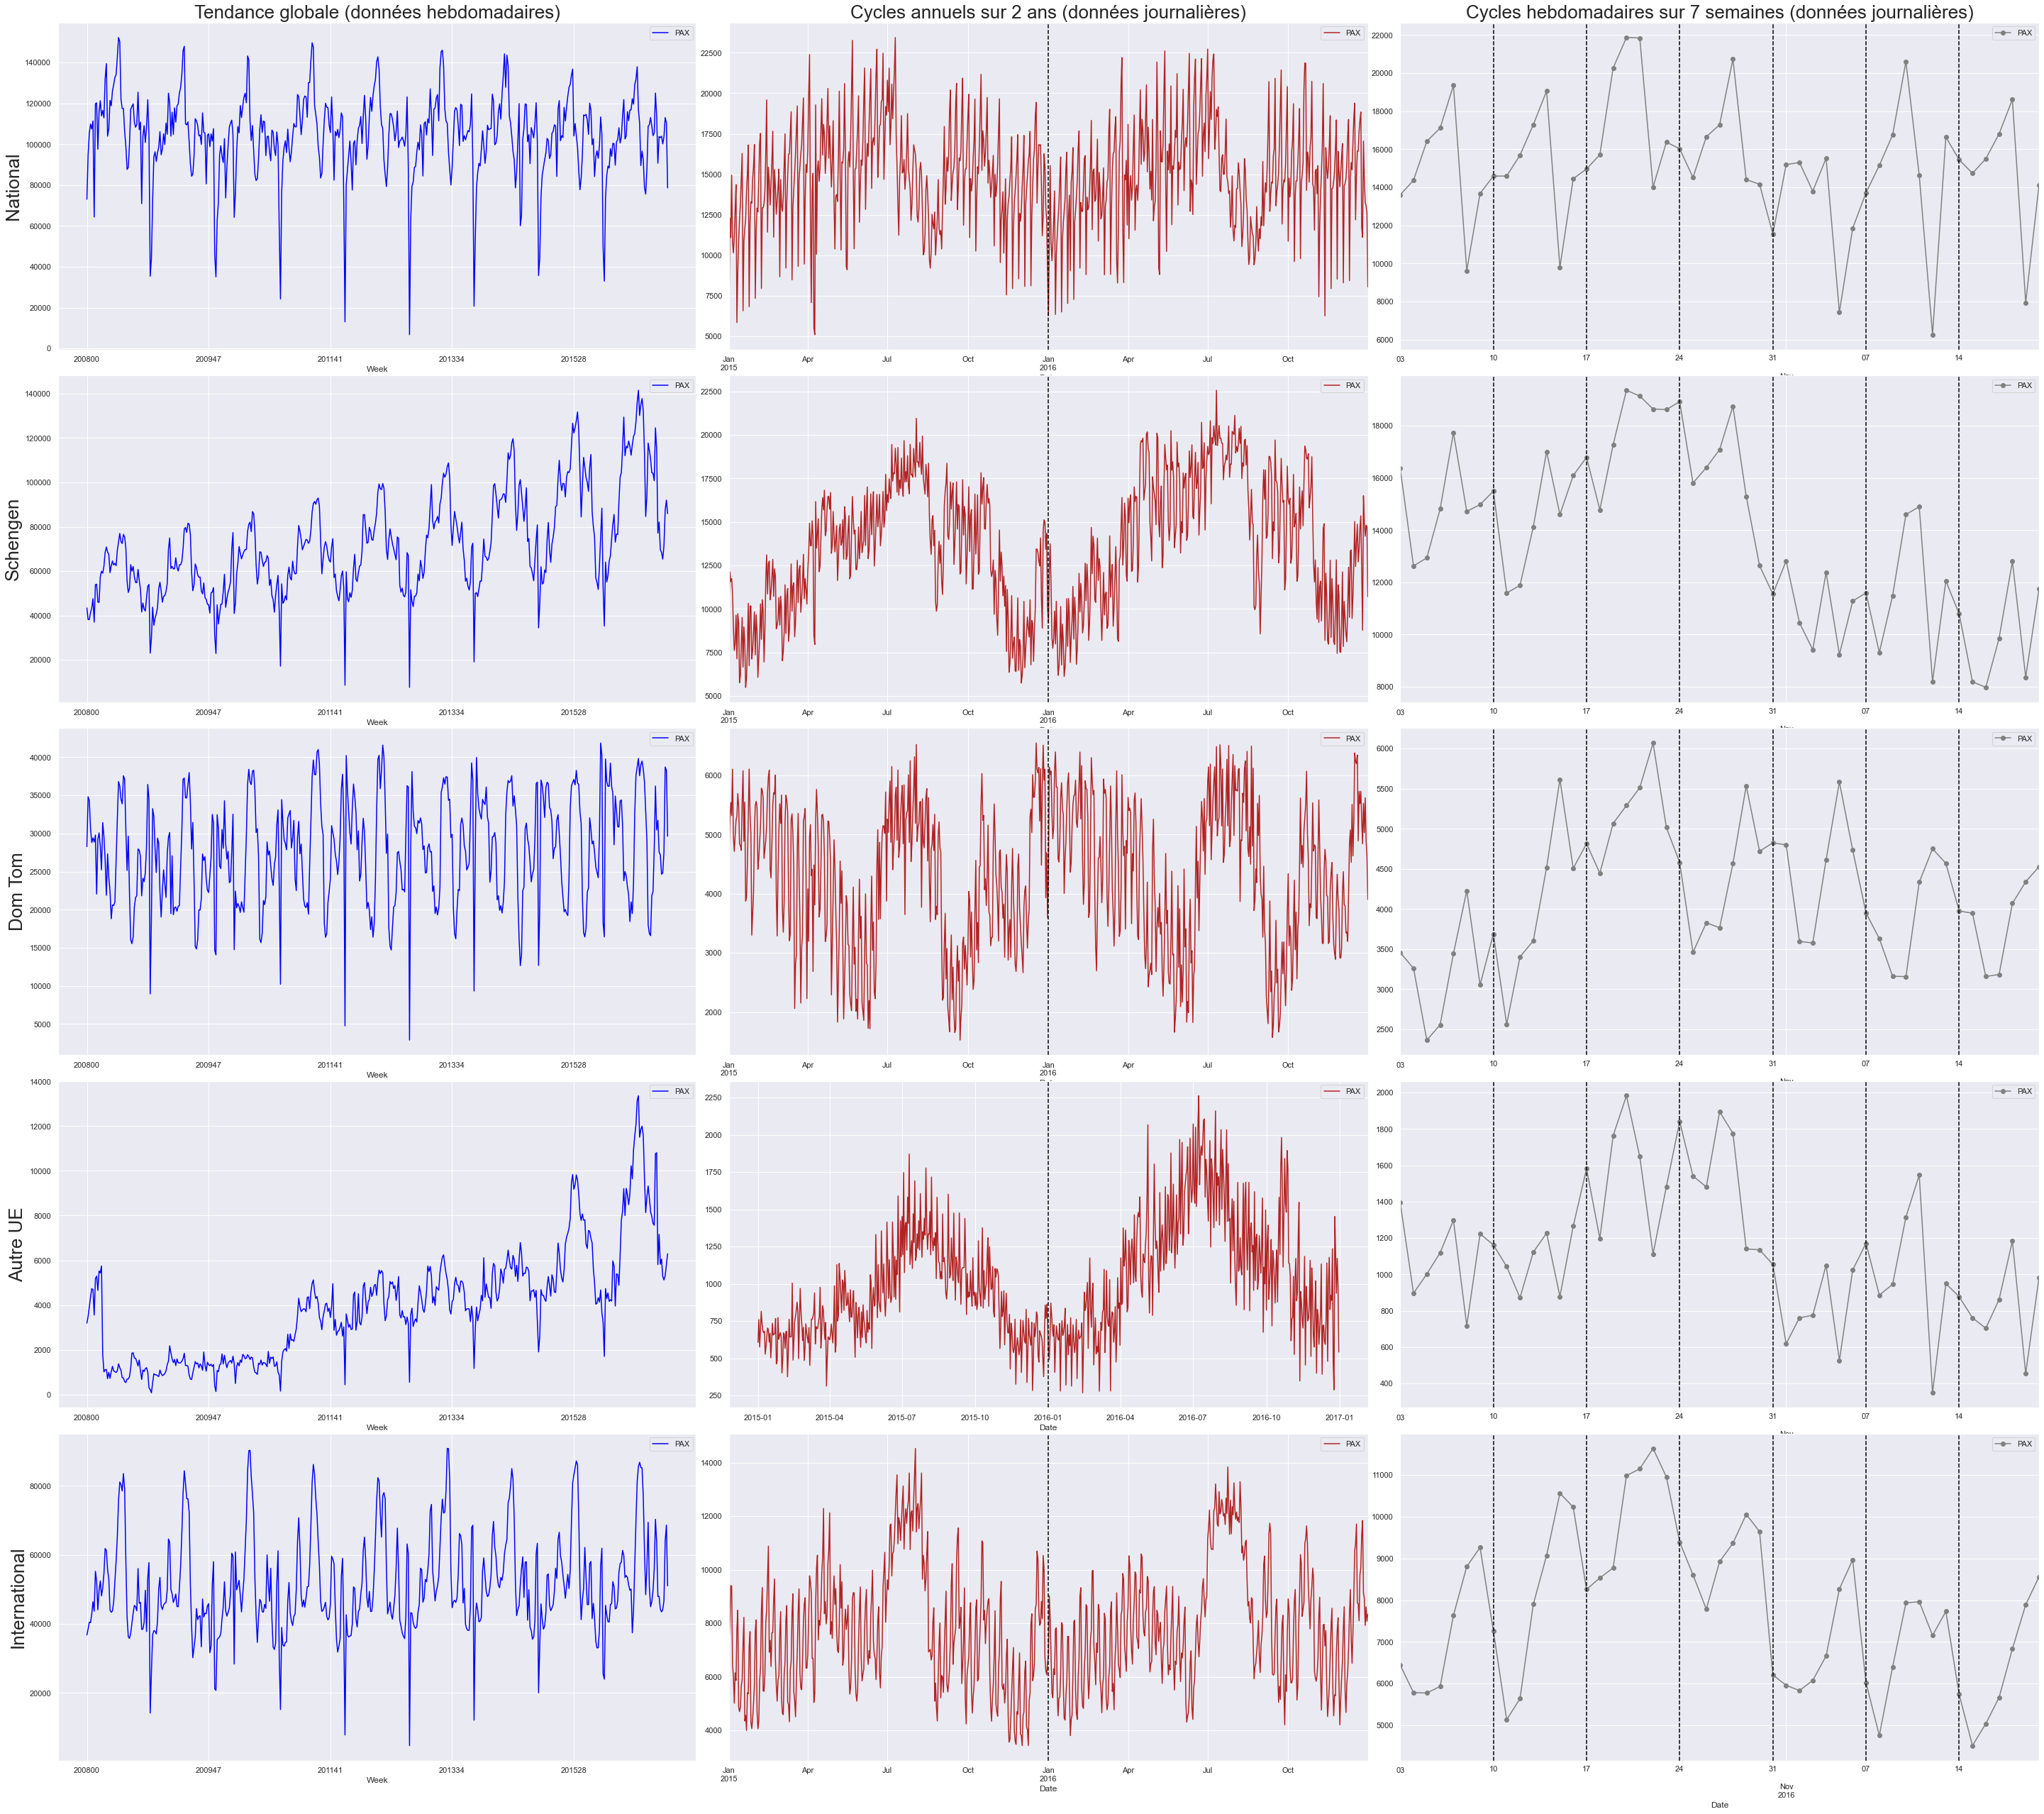

In [62]:
sns.set(style='darkgrid')

cols = ["Tendance globale (données hebdomadaires)","Cycles annuels sur 2 ans (données journalières)","Cycles hebdomadaires sur 7 semaines (données journalières)"]

fig, ax = plt.subplots(5,3, figsize=(40,35))

for axi, col in zip(ax[0], cols):
    axi.set_title(col,fontsize=26)

for axi, row in zip(ax[:,0], faisceaux):
    axi.set_ylabel(row, rotation=90,fontsize=26)

fig.tight_layout()


for i in range(5) :  
    database_depart[database_depart['Faisceau'].isin([faisceaux[i]])].groupby('Week').agg({'PAX':'sum'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='blue')
    
    database_depart_tronque[database_depart_tronque['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'PAX':'sum'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='firebrick')
    ax[(i,1)].axvline(np.datetime64('2016-01-01'),color='black',linestyle='--')
    
    database_depart_tronque2[database_depart_tronque2['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'PAX':'sum'}).plot(ax = ax[(i,2)],legend=True, subplots=True,color='grey',style='o-')
    for k in range(1,8) :
        ax[(i,2)].axvline(np.datetime64('2016-10-03')+np.timedelta64(k*7, 'D'),color='black',linestyle='--')
    
plt.show()
#fig.savefig('caracteristiques_trafic_pax.png')

## Représentations des taux de remplissages 

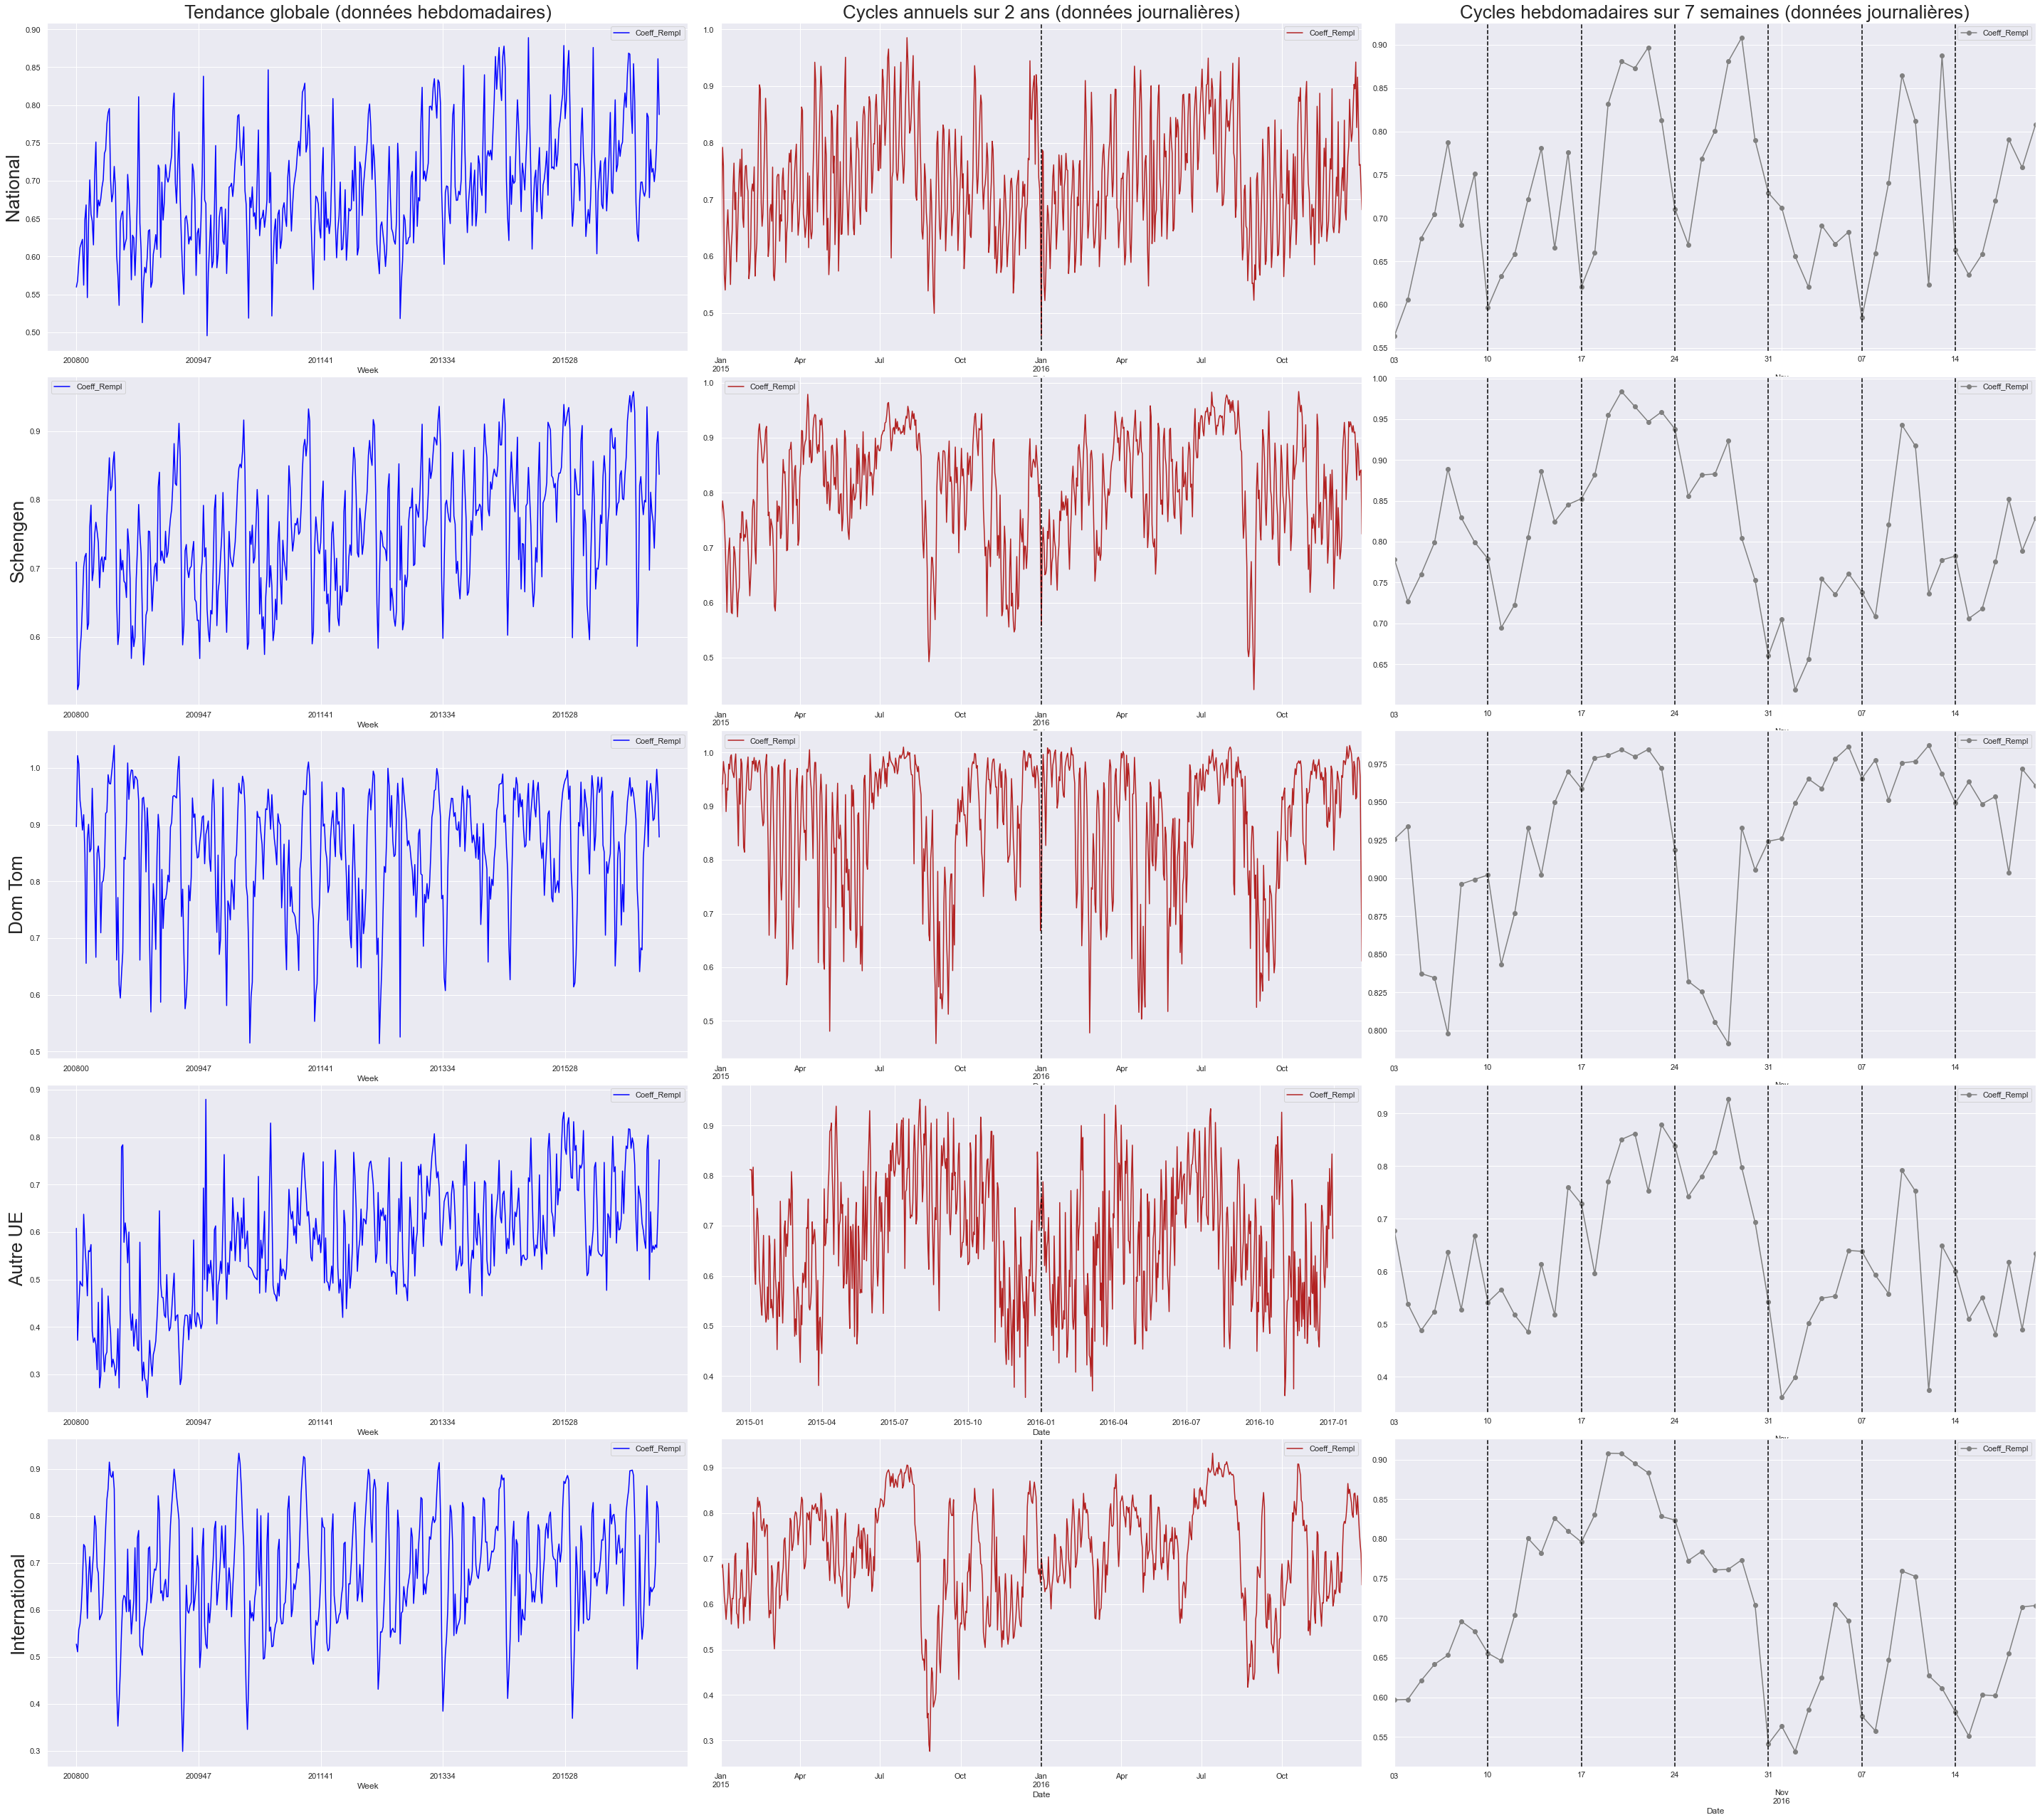

In [63]:
sns.set(style='darkgrid')

cols = ["Tendance globale (données hebdomadaires)","Cycles annuels sur 2 ans (données journalières)","Cycles hebdomadaires sur 7 semaines (données journalières)"]

fig, ax = plt.subplots(5,3, figsize=(40,35))

for axi, col in zip(ax[0], cols):
    axi.set_title(col,fontsize=26)

for axi, row in zip(ax[:,0], faisceaux):
    axi.set_ylabel(row, rotation=90,fontsize=26)

fig.tight_layout()


for i in range(5) :  
    database_depart[database_depart['Faisceau'].isin([faisceaux[i]])].groupby('Week').agg({'Coeff_Rempl':'mean'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='blue')
    
    database_depart_tronque[database_depart_tronque['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'Coeff_Rempl':'mean'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='firebrick')
    ax[(i,1)].axvline(np.datetime64('2016-01-01'),color='black',linestyle='--')
    
    database_depart_tronque2[database_depart_tronque2['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'Coeff_Rempl':'mean'}).plot(ax = ax[(i,2)],legend=True, subplots=True,color='grey',style='o-')
    for k in range(1,8) :
        ax[(i,2)].axvline(np.datetime64('2016-10-03')+np.timedelta64(k*7, 'D'),color='black',linestyle='--')
    
plt.show()
#fig.savefig('caracteristiques_trafic_coef.png')

## Représentations avec différenciation annuelle sur la troisième colonne :

In [54]:
# On va enlever les saisonnalités annuelles sur les données allant du lundi 03.10.2016 au vendredi 20.11.2016 (inclus). 
# Pour cela, on va utiliser une copie de la base 2, et une base 4 (du 03.10.2015 au 20.11.2015) groupées par jour et faisceau. 

database_depart_tronque3 = database_depart_tronque2.copy()

database_depart_tronque4 = database_depart[database_depart['Date']>np.datetime64('2015-10-02')]
database_depart_tronque4 = database_depart_tronque4[database_depart_tronque4['Date']<np.datetime64('2015-11-21')]

In [55]:
database_depart_tronque3 = database_depart_tronque3.groupby(['Date','Faisceau']).agg({'PAX':'sum','Coeff_Rempl':'mean'})

database_depart_tronque4.rename(columns={'PAX':'PAX ancien','Coeff_Rempl':'Coeff_Rempl ancien'},inplace=True)
database_depart_tronque4['Date'] = database_depart_tronque4['Date'] + np.timedelta64(1, 'Y') + np.timedelta64(1, 'D') - np.timedelta64(5,'h') - np.timedelta64(49,'m')-np.timedelta64(12,'s')
database_depart_tronque4 = database_depart_tronque4.groupby(['Date','Faisceau']).agg({'PAX ancien':'sum','Coeff_Rempl ancien':'mean'})

In [56]:
database_depart_tronque34 = pd.concat([database_depart_tronque3, database_depart_tronque4], axis=1).reset_index()

database_depart_tronque34['PAX corrigé'] = database_depart_tronque34['PAX'] - database_depart_tronque34['PAX ancien']
database_depart_tronque34['Coeff_Rempl corrigé'] = database_depart_tronque34['Coeff_Rempl'] - database_depart_tronque34['Coeff_Rempl ancien']

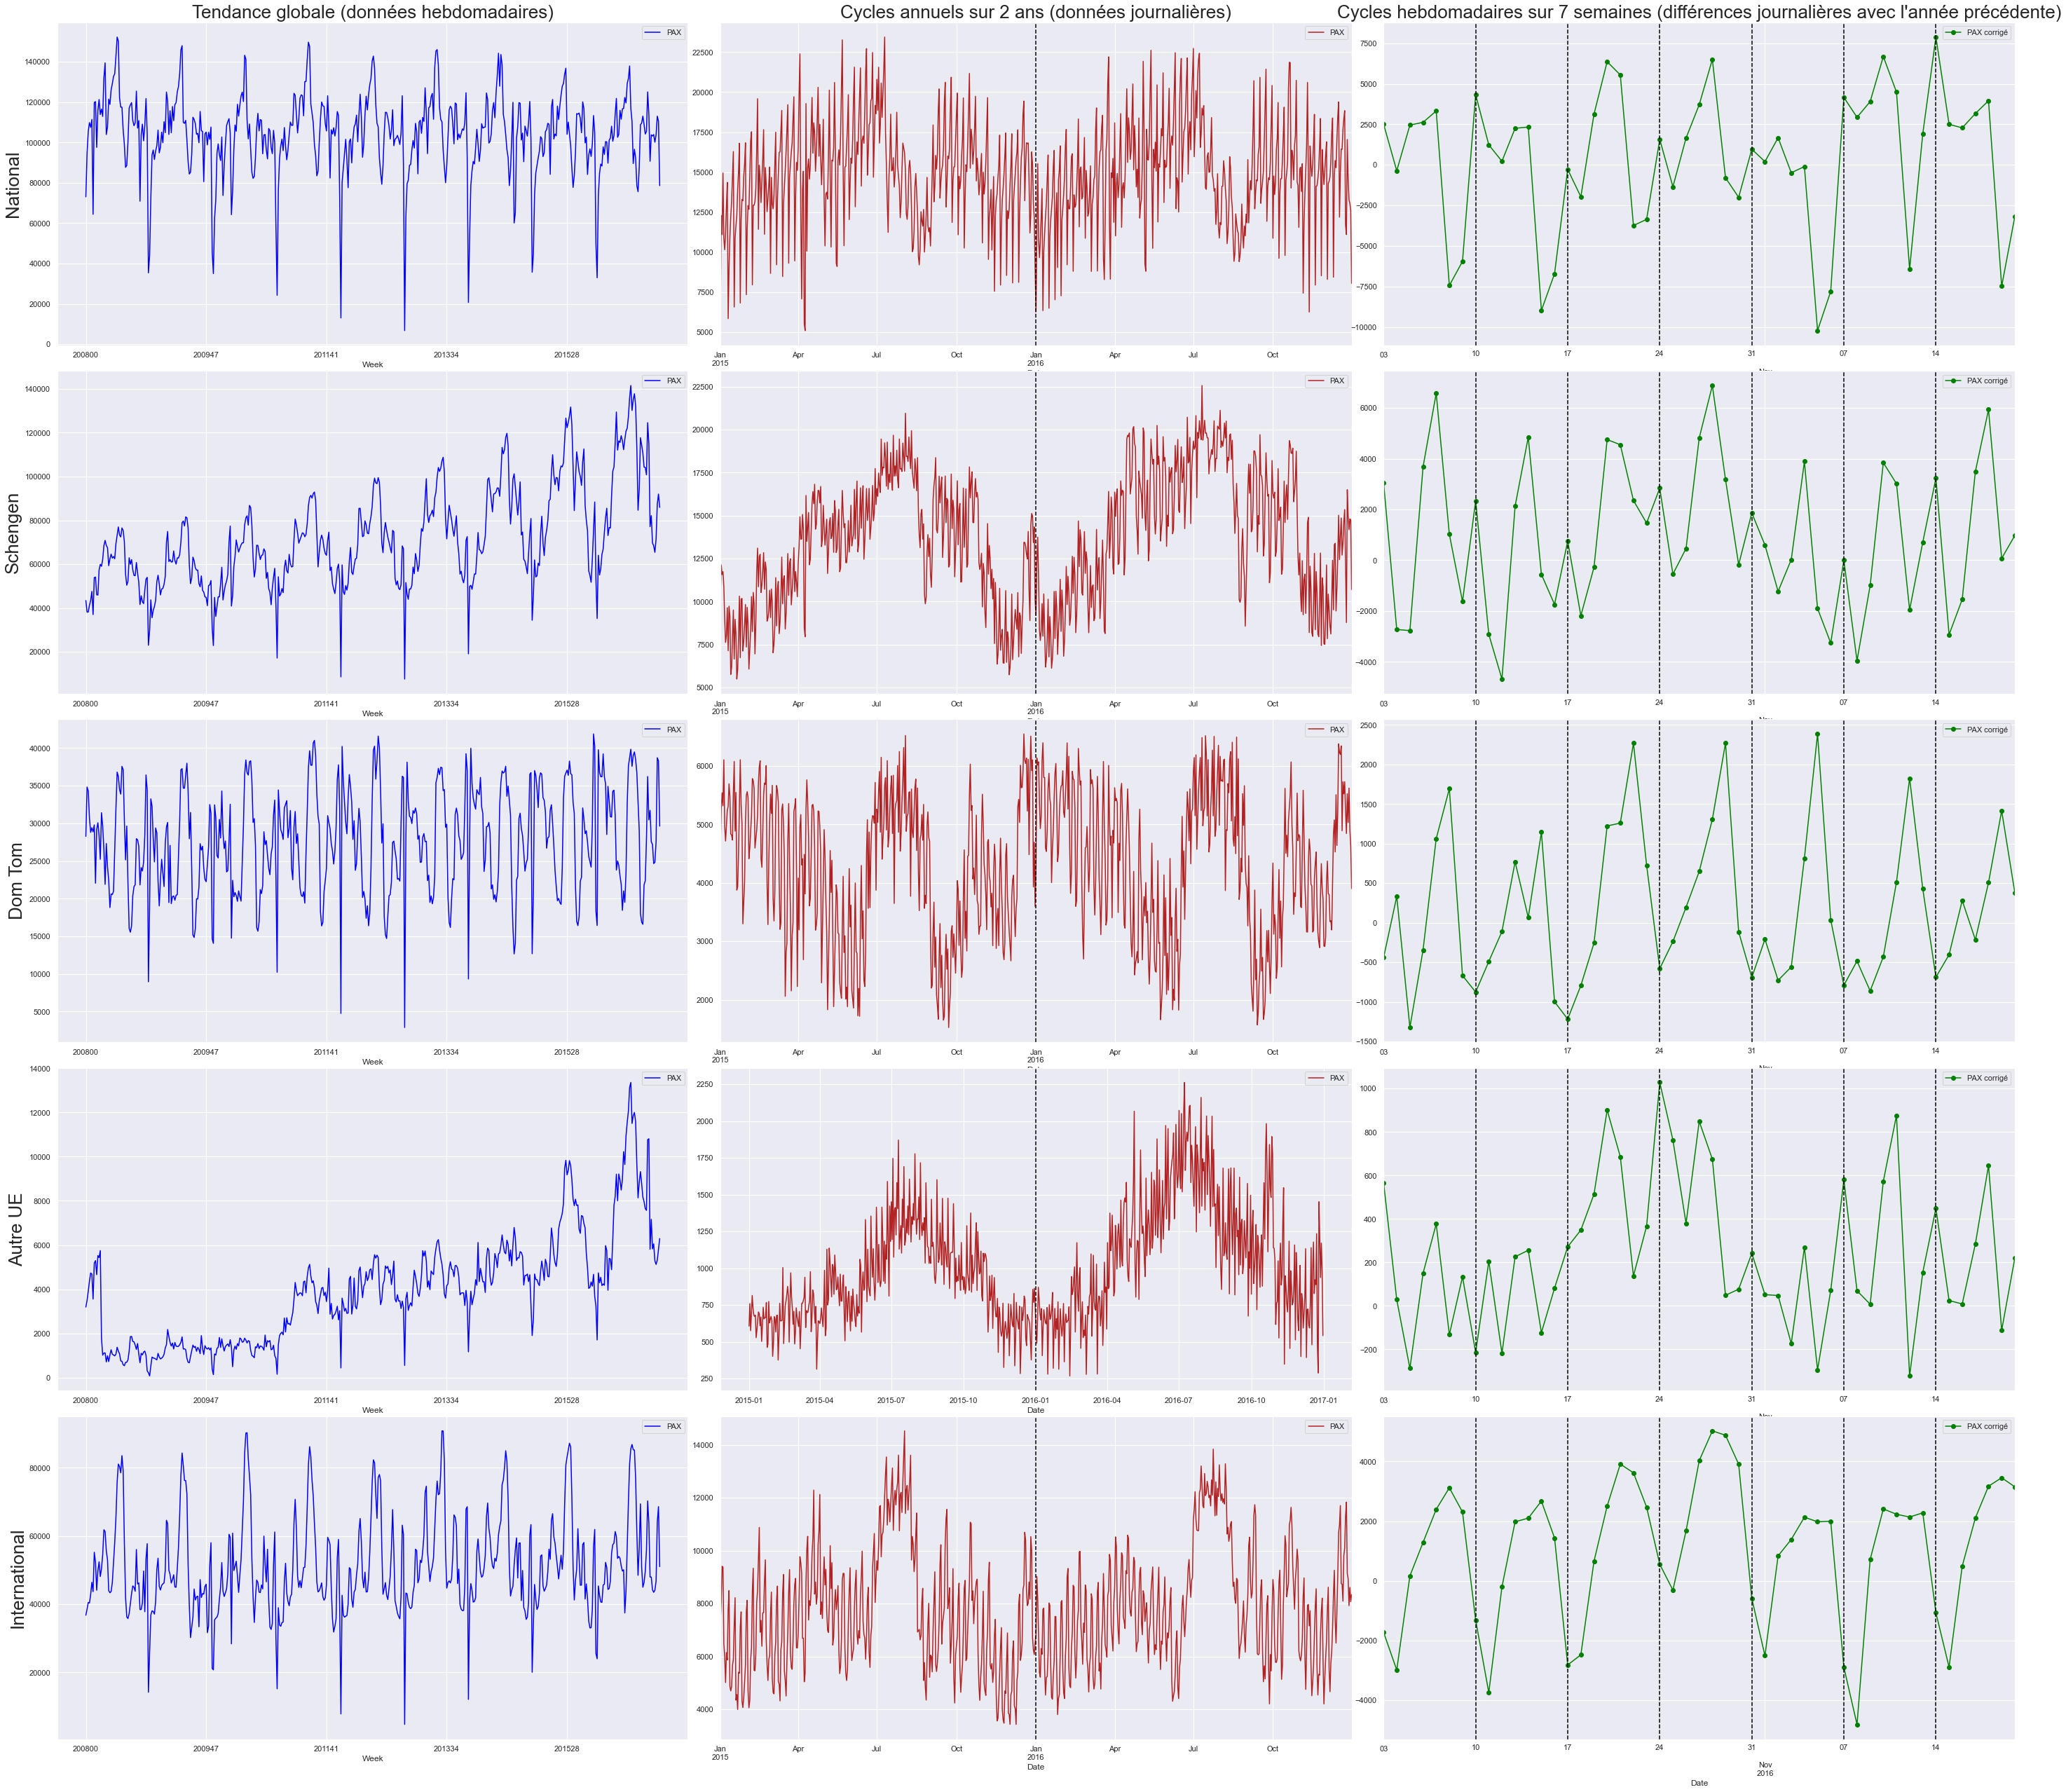

In [57]:
sns.set(style='darkgrid')

cols = ["Tendance globale (données hebdomadaires)","Cycles annuels sur 2 ans (données journalières)","Cycles hebdomadaires sur 7 semaines (différences journalières avec l'année précédente)"]

fig, ax = plt.subplots(5,3, figsize=(40,35))

for axi, col in zip(ax[0], cols):
    axi.set_title(col,fontsize=26)

for axi, row in zip(ax[:,0], faisceaux):
    axi.set_ylabel(row, rotation=90,fontsize=26)

fig.tight_layout()


for i in range(5) :  
    database_depart[database_depart['Faisceau'].isin([faisceaux[i]])].groupby('Week').agg({'PAX':'sum'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='blue')
    
    database_depart_tronque[database_depart_tronque['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'PAX':'sum'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='firebrick')
    ax[(i,1)].axvline(np.datetime64('2016-01-01'),color='black',linestyle='--')
    
    database_depart_tronque34[database_depart_tronque34['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'PAX corrigé':'sum'}).plot(ax = ax[(i,2)],legend=True, subplots=True,color='green',style='o-')
    for k in range(1,8) :
        ax[(i,2)].axvline(np.datetime64('2016-10-03')+np.timedelta64(k*7, 'D'),color='black',linestyle='--')
    
plt.show()
fig.savefig('caracteristiques_trafic_pax.png')

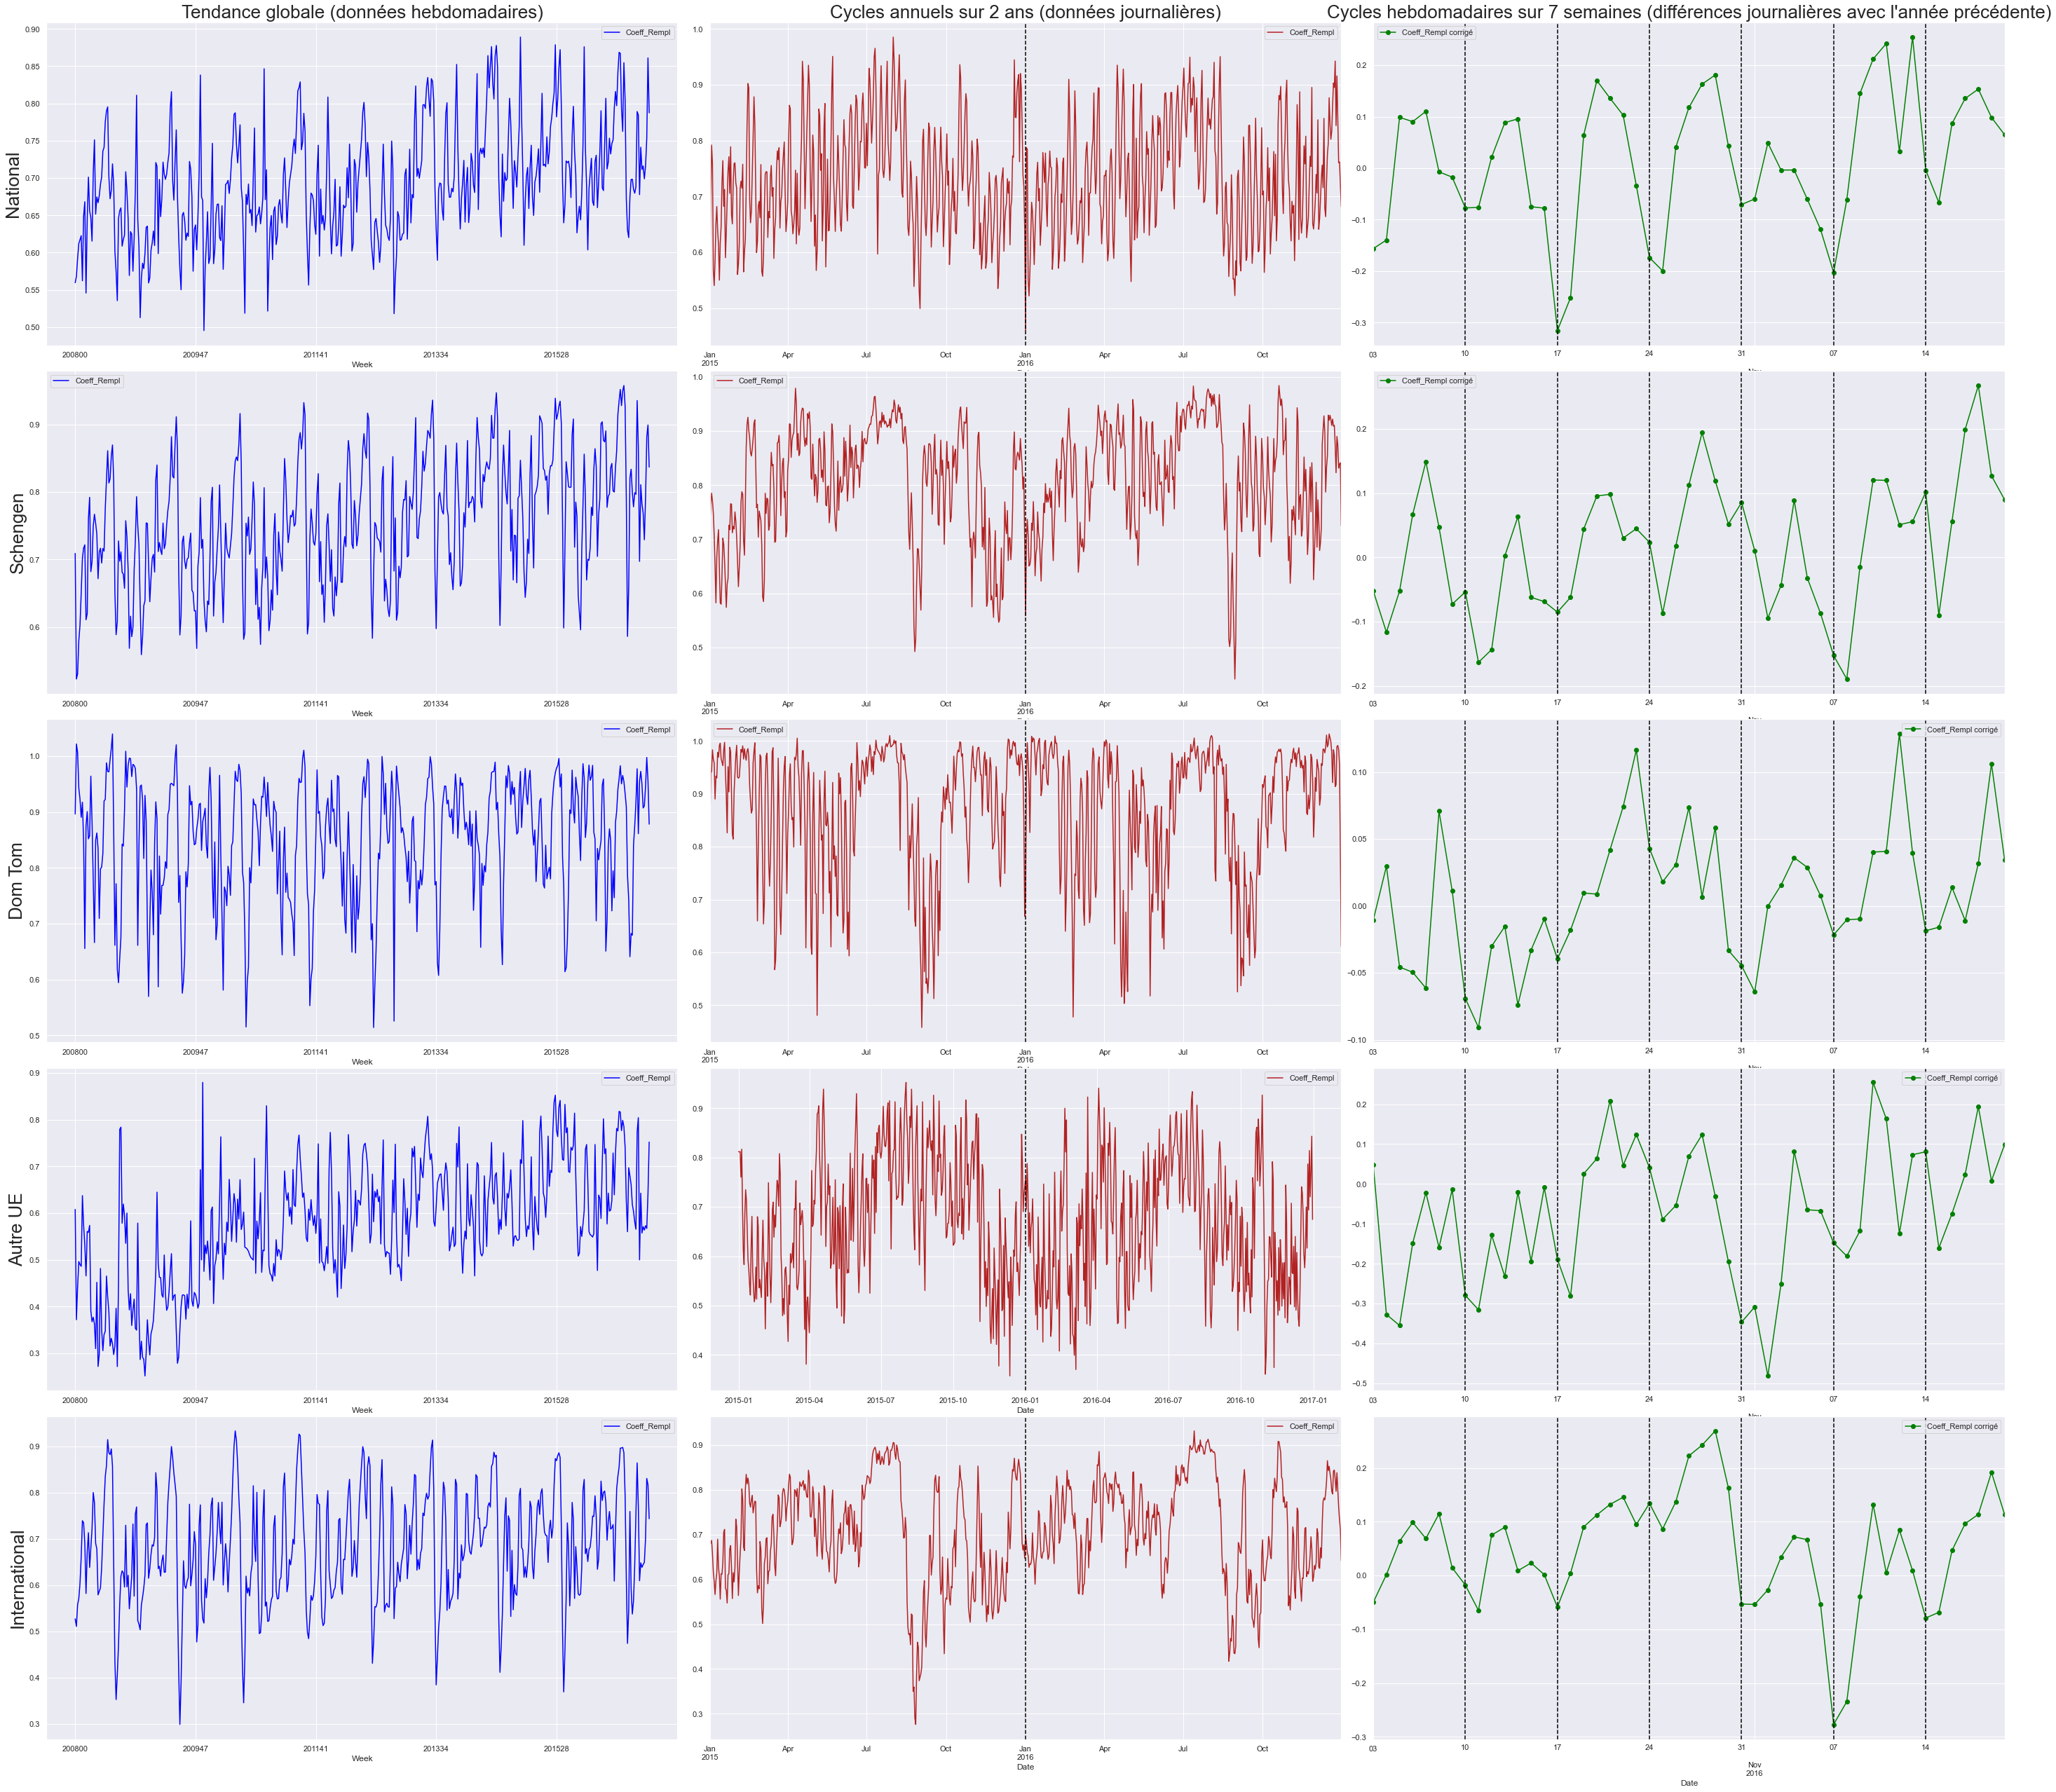

In [58]:
sns.set(style='darkgrid')

cols = ["Tendance globale (données hebdomadaires)","Cycles annuels sur 2 ans (données journalières)","Cycles hebdomadaires sur 7 semaines (différences journalières avec l'année précédente)"]

fig, ax = plt.subplots(5,3, figsize=(40,35))

for axi, col in zip(ax[0], cols):
    axi.set_title(col,fontsize=26)

for axi, row in zip(ax[:,0], faisceaux):
    axi.set_ylabel(row, rotation=90,fontsize=26)

fig.tight_layout()


for i in range(5) :  
    database_depart[database_depart['Faisceau'].isin([faisceaux[i]])].groupby('Week').agg({'Coeff_Rempl':'mean'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='blue')
    
    database_depart_tronque[database_depart_tronque['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'Coeff_Rempl':'mean'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='firebrick')
    ax[(i,1)].axvline(np.datetime64('2016-01-01'),color='black',linestyle='--')
    
    database_depart_tronque34[database_depart_tronque34['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'Coeff_Rempl corrigé':'sum'}).plot(ax = ax[(i,2)],legend=True, subplots=True,color='green',style='o-')
    for k in range(1,8) :
        ax[(i,2)].axvline(np.datetime64('2016-10-03')+np.timedelta64(k*7, 'D'),color='black',linestyle='--')

    
plt.show()
fig.savefig('caracteristiques_trafic_coef.png')